In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

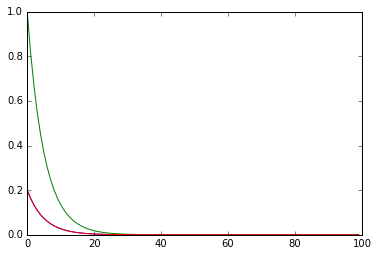

In [2]:
spikes = 1. * (np.random.rand(10000, 2) > 0.9)
kernel = np.exp(-np.arange(100)/5.)[:,None] * np.array([0.2, 1., 0.2])[None, :]
plt.plot(kernel)

In [3]:
from scipy import signal
lfp = signal.fftconvolve(spikes, kernel, 'same').T
mixture_matrix = np.array([[1., 0.5], [0.5, 1]])
lfp += np.random.randn(*lfp.shape) 

lfp = np.dot(mixture_matrix, lfp)
np.corrcoef(lfp)

array([[ 1.        ,  0.82638889],
       [ 0.82638889,  1.        ]])

In [4]:
from scipy import stats
cov_mat = np.cov(lfp)

In [5]:
def whitening_matrix(cov, cutoff=0.01):
    evals, evecs = np.linalg.eig(cov)

    inv_evals = 1./np.sqrt(evals)
    inv_evals[evals<cutoff*evals.max()] = 0

    w_mat = np.dot(np.dot(evecs, np.diag(inv_evals)), evecs.T)
    
    return w_mat


In [6]:
W = whitening_matrix(cov_mat)

In [7]:
spike_triggered = signal.fftconvolve(lfp[:, :], spikes[::-1,0, None].T, 'same')

In [8]:

def plot_sta(spike_triggered):
    N = spike_triggered.shape[1]

    plt.plot(spike_triggered[:, N/2-49:N/2-20].T, lw=2)

    plt.twinx()
    plt.plot(kernel[:30, 1:])
    plt.xlim(-10, 50)


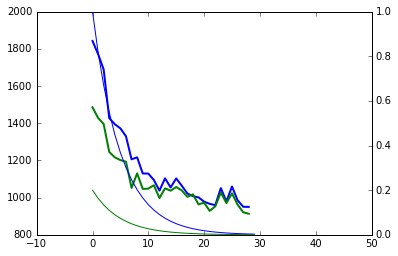

In [9]:
plot_sta(spike_triggered)

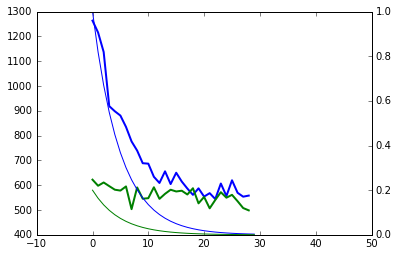

In [10]:
whitened_stlfp = np.dot(W, spike_triggered)

plot_sta(whitened_stlfp)

## Co-modulated Poisson population

In [11]:
npts = 10000
mixture_matrix = np.array([[1., 0.5], [0.5, 1]])
#mixture_matrix = np.eye(2)
rate = np.dot(mixture_matrix, np.random.rand(2, 10000)).T
spikes = 1. * (rate > 0.9)

In [12]:
spikes.shape

(10000, 2)

In [13]:
kernel = np.exp(-np.arange(100)/5.)[:,None] * np.array([0.5, 1., 0.5])[None, :]

In [14]:
print kernel.shape

(100, 3)


LFP is modelled as a sum of pre-synaptic and post-synaptic contributions:

In [15]:
lfp = signal.fftconvolve(spikes, kernel, 'same').T + 5 * rate.T

In [16]:
np.corrcoef(lfp)
cov_mat = np.cov(lfp)
W = whitening_matrix(cov_mat)

In [17]:
spike_triggered = signal.fftconvolve(lfp[:, :], spikes[::-1,0, None].T, 'same')
#spike_triggered /= signal.fftconvolve(np.ones_like(lfp), spikes[::-1,0, None].T, 'same')
whitened_stlfp = np.dot(W, spike_triggered)


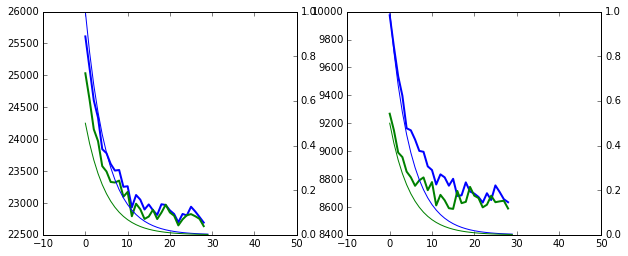

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_sta(spike_triggered)
plt.subplot(122)
plot_sta(whitened_stlfp)

In [19]:
np.corrcoef(np.dot(W, lfp))

array([[  1.00000000e+00,   6.94269680e-16],
       [  6.94269680e-16,   1.00000000e+00]])

In [20]:
signal.fftconvolve(np.ones_like(lfp), spikes[::-1,0, None].T, 'same')

array([[ 1744.,  1745.,  1745., ...,  1720.,  1719.,  1719.],
       [ 1744.,  1745.,  1745., ...,  1720.,  1719.,  1719.]])

In [21]:
spikes.shape[0]

10000